<a href="https://colab.research.google.com/github/ykkimhgu/DLIP-src/blob/main/Tutorial_PythonOpenCV/Tutorial_Opencv_Python_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DLIP - Python OpenCV Tutorial

Created by Smart Sensor System Lab
2022-1

## Preparation in Colab environment

### Loading Imaage file in Colab

Read more on how to load image file in Colab

https://ykkim.gitbook.io/dlip/dlip-installation-guide/ide/colab#loading-image-file-in-colab



> `cv.imshow()` is not available in Colab

In [ ]:
# Upload image file from local drive
from google.colab import files
uploaded=files.upload()

## Import OpenCV Library

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow as cv_imshow
from matplotlib import pyplot as plt

## Open & Show Image File

> matplotlib에서 rgb 채널 순서가 다르다
* matplot:  R-B-G
* OpenCV:   G-B-R


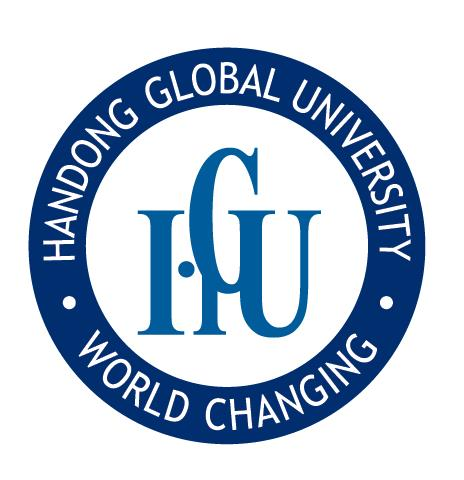

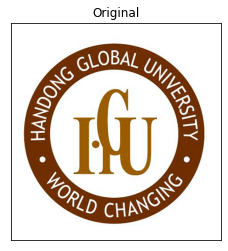

In [ ]:

# Load image
img = cv.imread('handonglogo.jpg')


# Show Image using Opencv imshow
#cv.imshow('frame',img)    # NOT available in COLAB or Jupyter
cv_imshow(img)             # Instead use this



imgPlt = cv.imread('handonglogo.jpg', cv.COLOR_BGR2RGB)
# matplotlib에서 rgb 채널 순서가 다르다
# matplot:  R-B-G
# OpenCV:   G-B-R

# Show Image using matplotlib
plt.imshow(imgPlt),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.show()

## Open WebCam
> cv.VideoCapture(0) is Not available in Colab


```python
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(1):
    _, frame = cap.read()

    cv2.imshow('frame',frame)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()
```



## Spatial Filter

* Box filter
* Gaussian filter
* Median filter

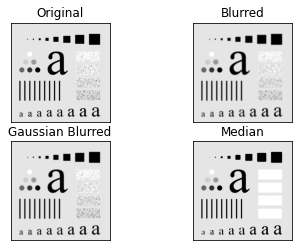

In [ ]:
# Load image
img = cv.imread('Pattern_original.tif')

# Spatial Filter
blur = cv.blur(img,(5,5))
gblur = cv.GaussianBlur(img,(5,5),0)
median = cv.medianBlur(img,5)

# Plot results
plt.subplot(221),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(gblur),plt.title('Gaussian Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(median),plt.title('Median')
plt.xticks([]), plt.yticks([])
plt.show()

## Thresholding
[thresh()](https://docs.opencv.org/3.4.17/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57)

`Python:cv.threshold(src, thresh, maxval, type[, dst]) ->retval, dst`

### Manual Local Threshold

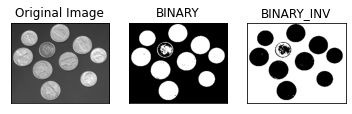

In [ ]:
# Open Image
img = cv.imread('coins.png',0)

thVal=127

# Apply Thresholding
ret,thresh1 = cv.threshold(img,thVal,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,thVal,255,cv.THRESH_BINARY_INV)

# Plot results
titles = ['Original Image','BINARY','BINARY_INV']
images = [img, thresh1, thresh2]

for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Adaptive  Threshold


`cv.adaptiveThreshold(	src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]	) `

Example code

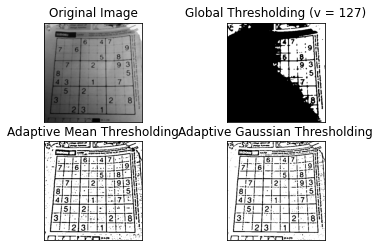

In [ ]:
img = cv.imread('sudoku.jpg',0)
img = cv.medianBlur(img,5)

# Global threshold
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

# Local threshold
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

# Plot results
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Plot Histogram

```python
hist=cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]	)
```

Example Code

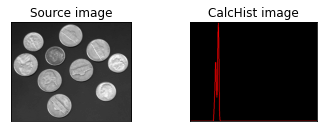

In [ ]:
# Open Image
img = cv.imread('coins.png',0)

histSize = 256
histRange = (0, 256) # the upper boundary is exclusive
b_hist = cv.calcHist(img, [0], None, [histSize], histRange, False)

hist_w = 512
hist_h = 400
bin_w = int(round( hist_w/histSize ))
histImage = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)

# Normalize histogram output
cv.normalize(b_hist, b_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)

for i in range(1, histSize):
    cv.line(histImage, ( bin_w*(i-1), hist_h - int(b_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(b_hist[i]) ),
            ( 255, 0, 0), thickness=2)

# Plot Results
#cv.imshow('Source image', img)
#cv.imshow('calcHist Demo', histImage)

plt.subplot(2,2,1),plt.imshow(img, 'gray')
plt.title('Source image')
plt.xticks([]),plt.yticks([])
plt.subplot(2,2,2),plt.imshow(histImage)
plt.title('CalcHist image')
plt.xticks([]),plt.yticks([])
plt.show()

## Morphology

Morphology: Erode, Dilate

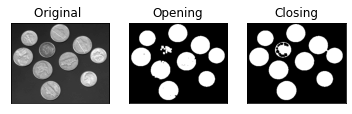

In [ ]:
# Open Image
src = cv.imread('coins.png',0)


# Threshold
ret,thresh1 = cv.threshold(src,127,255,cv.THRESH_BINARY)
img=thresh1

# Structure Element for Morphology
cv.getStructuringElement(cv.MORPH_RECT,(5,5))
kernel = np.ones((5,5),np.uint8)

# Morphology
erosion = cv.erode(img,kernel,iterations = 1)
dilation = cv.dilate(img,kernel,iterations = 1)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)


# Plot results
#cv.imshow('Original',img)
#cv.imshow('Opening',opening)
#cv.imshow('Closing',closing)

titles = ['Original ', 'Opening','Closing']
images = [src, opening, closing]

for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Color InRange

[inRange()](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga48af0ab51e36436c5d04340e036ce981)

` dst= cv2.inRange(src, lowerb, upperb, dst=None)`

Example code

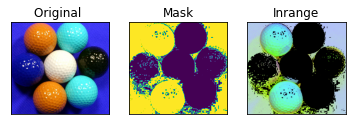

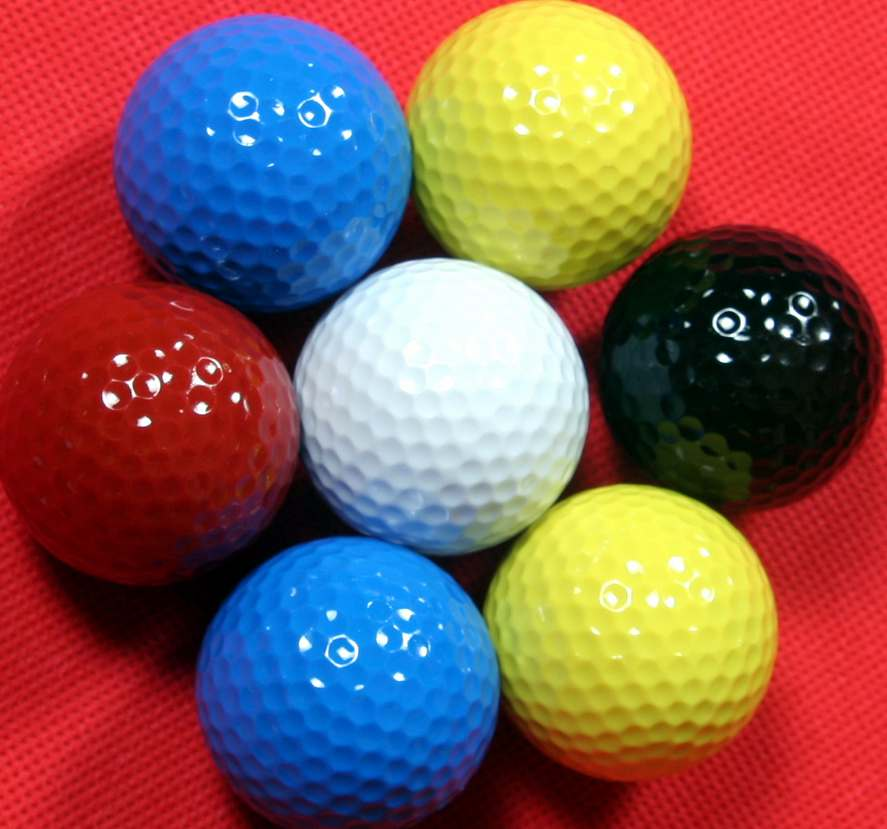

In [ ]:
# matplotlib에서 rgb 채널 순서가 다르다

# Open Image in RGB
img = cv.imread('color_ball.jpg',cv.COLOR_BGR2RGB)


# Convert BRG to HSV 
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Color InRange()
lower_range = np.array([100,128,0])
upper_range = np.array([215,255,255])
dst_inrange = cv.inRange(hsv, lower_range, upper_range)

# Mask selected range
mask = cv.inRange(hsv, lower_range, upper_range)
dst = cv.bitwise_and(hsv,hsv, mask= mask)

# Plot Results
#cv2.imshow('frame',frame)
#cv2.imshow('res',res)
titles = ['Original ', 'Mask','Inrange']
images = [img, mask, dst]

for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

cv_imshow(img)

## Edge & Line & Circle Detection



### Edge Detection

Example code


TypeError: ignored

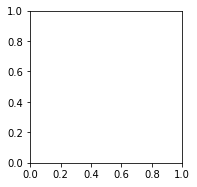

In [ ]:
img = cv.imread('coin.jpg',0)
thVal=127

# Apply Thresholding
ret,thresh1 = cv.threshold(img,thVal,255,cv.THRESH_BINARY)

# Canny Edge Detection
edges = cv.Canny(img,100,200)

# Plot Results
#cv.imshow('Edges',edges)
titles = ['Original','Edges']
images = [img, edges]
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Tutorial: OpenCv Python

# Python OpenCV Tutorial



## Open & Show Image File

```python
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Load image
img = cv.imread('opencv-logo-white.png')

# Show Image using Opencv imshow
cv2.imshow('frame',img)

# Show Image using matplotlib
plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.show()
```





## Open WebCam

```python
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(1):
    _, frame = cap.read()

    cv2.imshow('frame',frame)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()
```



## Spatial Filter

* Box filter
* Gaussian filter
* Median filter

```python
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('opencv-logo-white.png')

# Spatial Filter
blur = cv.blur(img,(5,5))
gblur = cv.GaussianBlur(img,(5,5),0)
median = cv.medianBlur(img,5)

# Plot results
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])

plt.show()
```



## Thresholding
[thresh()](https://docs.opencv.org/3.4.17/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57)

`Python:cv.threshold(src, thresh, maxval, type[, dst]) ->retval, dst`



### Manual Local Threshold

```python
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('coin.jpg',0)
thVal=127

# Apply Thresholding
ret,thresh1 = cv.threshold(img,thVal,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,thVal,255,cv.THRESH_BINARY_INV)
titles = ['Original Image','BINARY','BINARY_INV']
images = [img, thresh1, thresh2]

for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()
```



### Adaptive  Threshold

`cv.adaptiveThreshold(	src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]	) `

Example code

```python
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('sudoku.png',0)
img = cv.medianBlur(img,5)

# Global threshold
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

# Local threshold
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

# Plot results
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()
```





### Plot Histogram

```python
hist=cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]	)
```

Example Code

``` python
img = cv.imread('sudoku.png',0)  # Gray scale image

histSize = 256
histRange = (0, 256) # the upper boundary is exclusive
b_hist = cv.calcHist(img, [0], None, [histSize], histRange, False)

hist_w = 512
hist_h = 400
bin_w = int(round( hist_w/histSize ))
histImage = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)

# Normalize histogram output
cv.normalize(b_hist, b_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)

for i in range(1, histSize):
    cv.line(histImage, ( bin_w*(i-1), hist_h - int(b_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(b_hist[i]) ),
            ( 255, 0, 0), thickness=2)

cv.imshow('Source image', src)
cv.imshow('calcHist Demo', histImage)
```





## Morphology

Morphology: Erode, Dilate

```python
import cv2 as cv
import numpy as np
img = cv.imread('j.png',0)

# Structure Element for Morphology
cv.getStructuringElement(cv.MORPH_RECT,(5,5))
kernel = np.ones((5,5),np.uint8)

# Morphology
erosion = cv.erode(img,kernel,iterations = 1)
dilation = cv.dilate(img,kernel,iterations = 1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

cv2.imshow('Original',img)
cv2.imshow('Opening',opening)
cv2.imshow('Closing',closing)
```



## Color InRange

[inRange()](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga48af0ab51e36436c5d04340e036ce981)

` dst= cv2.inRange(src, lowerb, upperb, dst=None)`

Example code

```python
# Convert BRG to HSV 
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    .
# Color InRange()
lower_range = np.array([100,128,0])
upper_range = np.array([215,255,255])
dst_inrange = cv2.inRange(hsv, lower_range, upper_range)

# Mask selected range
mask = cv2.inRange(hsv, lower_red, upper_red)
res = cv2.bitwise_and(hsv,hsv, mask= mask)

cv2.imshow('frame',frame)
cv2.imshow('res',res)
```



## Edge & Line & Circle Detection



### Edge Detection

Example code

```python
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('coin.jpg',0)
thVal=127

# Apply Thresholding
ret,thresh1 = cv.threshold(img,thVal,255,cv.THRESH_BINARY)

# Canny Edge Detection
edges = cv2.Canny(thresh1,100,200)

cv2.imshow('Edges',edges)
    
```

### Line Detection

```python
# default_file = 'sudoku.png'

# Canny Edge Detection
dst = cv.Canny(img, 50, 200, None, 3)

# Copy edges to the images that will display the results in BGR
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

# (Option 1) HoughLines
lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)

# (Option 2) HoughLinesP
linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
if linesP is not None:
	for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)

        
cv.imshow("Source", img)
cv.imshow("Detected Lines (in red) - Standard Hough Line Transform", cdst)
cv.imshow("Detected Lines (in red) - Probabilistic Line Transform", cdstP)

    
```





### Circle Detection

Example code

```python
# Convert it to grayscale:
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

# Reduce noise and avoid false circle detection
gray = cv.medianBlur(gray, 5)


# Hough Circle Transform
rows = gray.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows / 8,
                               param1=100, param2=30,
                               minRadius=1, maxRadius=30)
    
# Draw circle
if circles is not None:
	circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # Draw circle center
        cv.circle(src, center, 1, (0, 100, 100), 3)
        # Draw circle outline
        radius = i[2]
        cv.circle(src, center, radius, (255, 0, 255), 3)


cv.imshow("detected circles", src)

```



# Exercise

## Exercise 1: Gray Scale Image



## Exercise 2: Color  Image



